In [1]:
# %pip install opendatasets
# %pip install prophet

import opendatasets as od
import pandas as pd
import numpy as np

# od.download('https://www.kaggle.com/datasets/arjuntejaswi/plant-village')

In [2]:
import tensorboard

In [3]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt


In [4]:
directory = 'plant-village'

# Generates a tf.data.Dataset from image files in a directory.
df = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2152 files belonging to 3 classes.


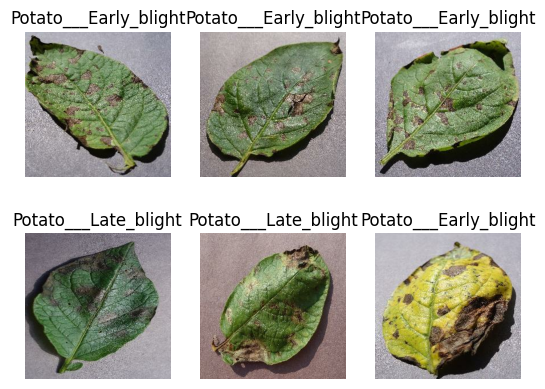

In [5]:
for images, labels in df.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(df.class_names[labels[i]])
        plt.axis("off")

In [6]:
len(df)

68

In [7]:
# tf.take(10) will take 10 image sets from the dataset
# tf.skip(10) will skip 10 image sets from the dataset
# doen't need to shuffle the dataset as it is already shuffled

train_ds = df.take(54)
test_ds = df.skip(54)

val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [8]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


In [9]:
# cache the dataset in the memory to improve performance
# prefetch the dataset to improve performance
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
# resising images as new images may be of different size
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1./255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    # layers.RandomRotation(0.2),
    # tf.keras.layers.RandomZoom(.5, .2),
    # layers.RandomContrast(0.2),
])

In [14]:
# for images, labels in df.take(1):
#     image = images[0].numpy().astype("uint8")
# plt.imshow(image)
# plt.axis("off")

In [15]:
# image = tf.cast(tf.expand_dims(image, 0), tf.float32)

In [16]:
# plt.figure(figsize=(10, 10))
# for i in range(9):
#   augmented_image = data_augmentation(image)
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_image[0])
#   plt.axis("off")


In [17]:
model = Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, 3 , activation='relu', padding='same', input_shape=(256, 256, 3)),
    layers.MaxPool2D(2),
    layers.Conv2D(64, 3 , activation='relu', padding='same'),
    layers.MaxPool2D(2),
    layers.Conv2D(64, 3 , activation='relu', padding='same'),
    layers.MaxPool2D(2),
    layers.Conv2D(64, 3 , activation='relu', padding='same'),
    layers.MaxPool2D(2),
    layers.Conv2D(64, 3 , activation='relu', padding='same'),
    layers.MaxPool2D(2),
    # layers.Conv2D(64, 3 , activation='relu', padding='same'),
    # layers.MaxPool2D(2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.build(input_shape=(32, 256, 256, 3))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 128, 128, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 64, 64, 64)         0         
 2D)                                                  

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10


: 

: 